Chapter 22

# 鸡或兔或猪
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码通过贝叶斯建模来估计三种动物（兔子、鸡和猪）的比例参数 \(\theta\) 的后验分布。设定的先验分布为 Dirichlet 分布$\text{Dirichlet}(\alpha) $，其中 $\alpha = [2, 2, 2]$，以表示对三种动物比例的均匀先验假设。代码基于观察数据 $\text{data} = [65, 115, 20] $，即兔子、鸡和猪的观测频数，通过多项式分布建立似然函数，使用 PyMC3 进行贝叶斯推断。

1. **先验和似然**：设定 Dirichlet 分布作为先验，用参数为 $\alpha = [2, 2, 2]$，假设每种动物的比例为均匀分布；定义多项分布作为似然函数，用于描述观测数据给定比例下的出现概率。似然为：
   $$
   P(\text{data} | \theta) = \text{Multinomial}(\text{data} | n, \theta)
   $$
   其中 \( n = 65 + 115 + 20 = 200 \)。

2. **MCMC采样后验分布**：使用 Metropolis-Hastings 算法采样，通过 1000 次迭代生成后验分布，两个链（chains）确保采样收敛。

3. **结果展示**：输出后验分布的统计摘要，并可视化后验分布，包含：
   - **采样轨迹图**：展示每个链的参数值随迭代次数的变化，以验证采样的稳定性。
   - **后验直方图**和**核密度估计图**：以直方图和 KDE 展示后验分布的估计结果，并观察每种动物比例的分布范围。

后验分布为条件概率 $ P(\theta | \text{data}) $ 的估计，遵循公式：
$$
P(\theta | \text{data}) \propto P(\text{data} | \theta) \cdot P(\theta)
$$
生成的直方图、轨迹图和 KDE 共同帮助验证参数的分布特征和模型的稳定性。

## 导入所需的库

In [1]:
import pandas as pd  # 用于数据处理
import numpy as np  # 用于数值计算
import matplotlib.pyplot as plt  # 用于绘图
import pymc as pm  # 导入PyMC库，用于贝叶斯建模
# https://www.pymc.io/projects/docs/en/latest/installation.html
# conda create -c conda-forge -n pymc_env "pymc>=5"
# conda activate pymc_env
# https://snyk.io/advisor/python/pymc

## 设置先验分布的参数

In [2]:
alphas = np.array([2, 2, 2])  # Dirichlet分布的参数，代表先验分布

## 定义观测数据

In [3]:
data = np.array([65, 115, 20])  # 观测到的兔子、鸡和猪的数据
animals = ['Rabbit', 'Chicken', 'Piglet']  # 对应动物种类的标签

## 创建模型对象

In [4]:
with pm.Model() as model:
    prior = pm.Dirichlet('parameters', a=alphas, shape=3)  # 设置Dirichlet分布作为先验分布
    observed_data = pm.Multinomial('observed_data', 
                                   n=data.sum(), 
                                   p=prior, 
                                   shape=3, 
                                   observed=data)  # 定义多项分布作为似然函数

## 模拟后验分布

In [5]:
with model:
    trace = pm.sample(draws=1000, chains=2, tune=200, discard_tuned_samples=True)  # 进行MCMC采样获取后验分布

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [parameters]


C:\Users\james\anaconda3\envs\pymc_env\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 200 tune and 1_000 draw iterations (400 + 2_000 draws total) took 30 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


## 输出采样结果

In [6]:
summary = pm.summary(trace)  # 生成后验分布的统计摘要
summary.index = animals  # 设置摘要结果的行标签为动物种类
print(summary)  # 输出统计摘要

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Rabbit   0.325  0.033   0.267    0.389      0.001    0.001    1739.0   
Chicken  0.568  0.034   0.507    0.634      0.001    0.001    2037.0   
Piglet   0.106  0.022   0.066    0.145      0.001    0.000    1631.0   

         ess_tail  r_hat  
Rabbit     1339.0    1.0  
Chicken    1520.0    1.0  
Piglet      895.0    1.0  


## 绘制采样轨迹图

Text(0.5, 0, 'Iteration')

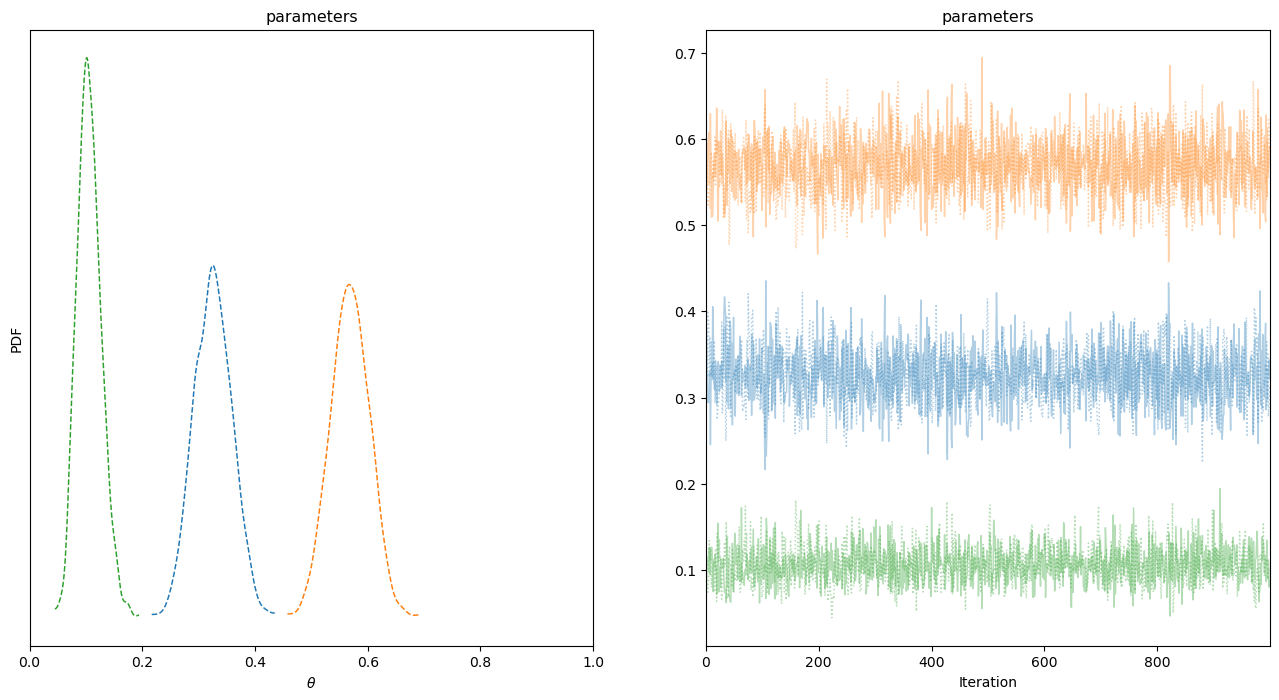

In [8]:
ax = pm.plot_trace(trace, figsize=(16, 8), combined=True)  # 绘制采样轨迹图并合并多个链
ax[0][0].set_xlabel(r'$\theta$')  # 设置x轴标签
ax[0][0].set_ylabel('PDF')  # 设置y轴标签
ax[0][0].set_xlim(0, 1)  # 设置x轴范围
ax[0][1].set_xlabel('Iteration')  # 设置迭代次数的x轴标签

# plt.savefig('Rabbit_Chicken_Piglet_Posterior_Trace_plot_200.svg')  # 保存采样轨迹图

## 绘制后验直方图

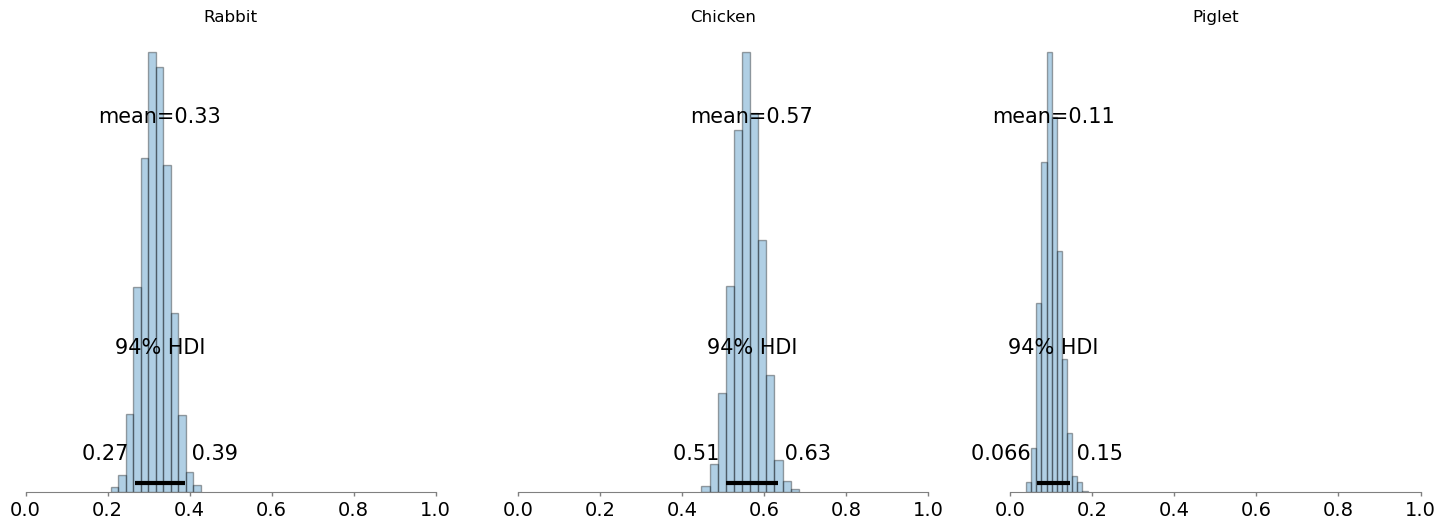

In [9]:
ax = pm.plot_posterior(trace, kind="hist", figsize=(18, 6), edgecolor='k')  # 绘制后验直方图
for i, a in enumerate(animals):
    ax[i].set_title(a)  # 设置每个图的标题为动物种类
    ax[i].set_xlim(0, 1)  # 设置x轴范围

# plt.savefig('Rabbit_Chicken_Piglet_Posterior_Hist_200.svg')  # 保存后验直方图

## 绘制后验核密度估计图

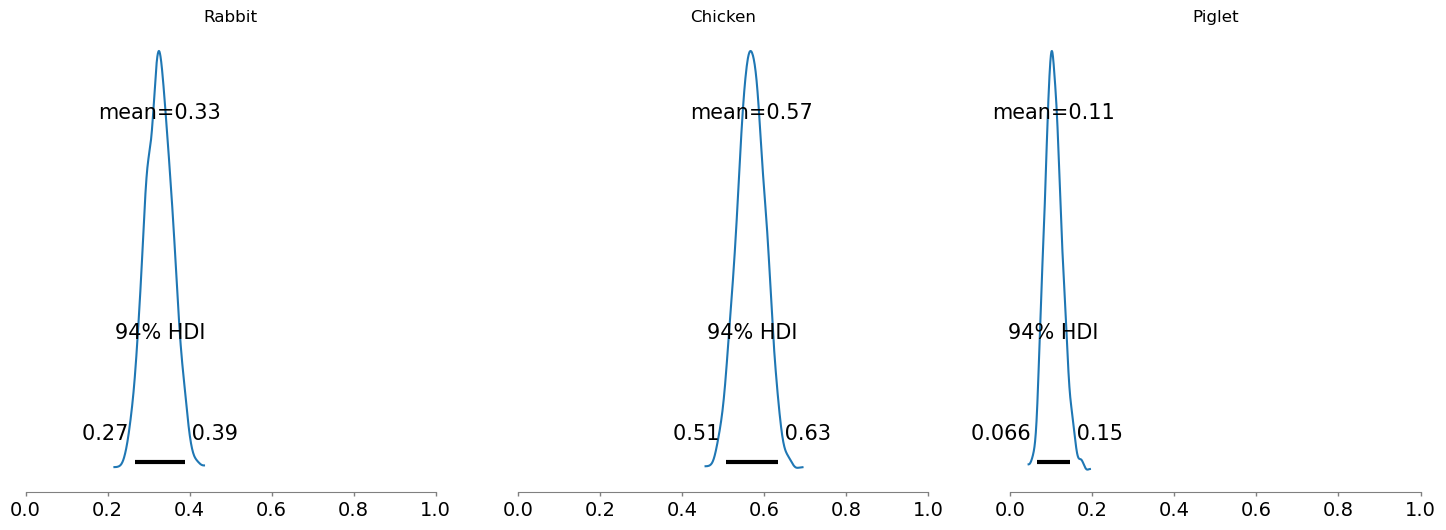

In [10]:
ax = pm.plot_posterior(trace, kind="kde", figsize=(18, 6))  # 绘制后验分布的核密度估计图
for i, a in enumerate(animals):
    ax[i].set_title(a)  # 设置每个图的标题为动物种类
    ax[i].set_xlim(0, 1)  # 设置x轴范围

# plt.savefig('Rabbit_Chicken_Piglet_Posterior_KDE_200.svg')  # 保存后验分布的核密度估计图